This file consists of code for below tasks
1) Copy data to google drive
2) Extract zip files
3) Read images from the files and load into array
4) Save array data into file

In [1]:
#connect to google drive
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/LablFiles/CNN_Project_1'

/content/drive/MyDrive/LablFiles/CNN_Project_1


The data set is copied from the link given to my own google drive...there I unzipped file and has 2 data set - train and test

In [4]:
ls

'CV with CNN Project 1 -Dataset'@                test/
'Dataset - Plant-seedlings-classification.zip'   train/
 sample_submission.csv                           train.npy


In [5]:
cd train

/content/drive/MyDrive/LablFiles/CNN_Project_1/train


In [6]:
cd ..

/content/drive/MyDrive/LablFiles/CNN_Project_1


In [7]:
cd test

/content/drive/MyDrive/LablFiles/CNN_Project_1/test


Lets create dataset of images in Training folder.
A dataframe - Filename, Filepath, Image shape and Label

In [8]:
import os, sys
import numpy as np
import pandas as pd

In [9]:
cd '/content/drive/MyDrive/LablFiles/CNN_Project_1/train'

/content/drive/MyDrive/LablFiles/CNN_Project_1/train


In [10]:
ls

 Black-grass/        'Common wheat'/      'Scentless Mayweed'/
 Charlock/           'Fat Hen'/           'Shepherds Purse'/
 Cleavers/           'Loose Silky-bent'/  'Small-flowered Cranesbill'/
'Common Chickweed'/   Maize/              'Sugar beet'/


There are 12 classes in the train data set

In [11]:
# Get list of folders in '/train' folder
basefolder = '/content/drive/MyDrive/LablFiles/CNN_Project_1/train'
folderlst = [f for f in os.listdir(basefolder) if os.path.isdir(os.path.join(basefolder, f))]
folderlst

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [12]:
#dictionary all classes.
classes={
   0:'Black-grass',      1:'Charlock',         2:'Cleavers',
   3:'Common Chickweed', 4:'Common wheat',     5:'Fat Hen',
   6:'Loose Silky-bent', 7:'Maize',            8:'Scentless Mayweed',
   9:'Shepherds Purse',  10:'Small-flowered Cranesbill',11:'Sugar beet' }

In [13]:
#dictionary to label all classes.
labels={
   'Black-grass':0,      'Charlock':1,         'Cleavers':2,
   'Common Chickweed':3, 'Common wheat':4,     'Fat Hen':5,
   'Loose Silky-bent':6, 'Maize':7,            'Scentless Mayweed':8,
   'Shepherds Purse':9,  'Small-flowered Cranesbill':10, 'Sugar beet':11 }

In [ ]:
#Iterate through each folder, get each file and covert image to array

In [14]:
import tensorflow as tf

In [15]:
dfImageSet = pd.DataFrame(columns={'Filename', 'ImageWidth','ImageHeight','ImageChannels', 'PlantName', 'Class'})
dfImageSet.drop(dfImageSet.index,axis=0,inplace=True)
# Iterate through each class folder and read image detaills and store in dataframe
for folder in folderlst :
  i=0
  classFolder = basefolder + '/' + folder
  files = [f for f in os.listdir(classFolder) if os.path.isfile(os.path.join(classFolder, f))]
  for fi in files :
    #print(fi)
    completeFilePath = classFolder + '/' + fi
    Image = tf.keras.preprocessing.image.load_img(completeFilePath)
    Imagearr = tf.keras.preprocessing.image.img_to_array(Image)
    shape = Imagearr.shape
    #Add details in dataframe
    dic = {'Filename':fi, 'ImageWidth':Imagearr.shape[0],'ImageHeight':Imagearr.shape[1],'ImageChannels':Imagearr.shape[2], 
           'PlantName':folder, 'Class':labels[folder]}
    #dic = {'ImagePath':completeFilePath, 'ImageShape':shape, 'PlantName':classFolder}
    #dfImageSet.loc[i] = list(completeFilePath,shape,classFolder,labels[classFolder])
    dfImageSet= dfImageSet.append(dic,ignore_index=True)


Lest check the image size etc.

In [16]:
dfImageSet.head()

,ImageWidth,ImageHeight,ImageChannels,Class,PlantName,Filename
0,388,388,3,0,Black-grass,0183fdf68.png
1,117,117,3,0,Black-grass,05eedce4d.png
2,886,886,3,0,Black-grass,0260cffa8.png
3,196,196,3,0,Black-grass,0050f38b3.png
4,251,251,3,0,Black-grass,082314602.png


In [17]:
#Let check what are different values of width
dfImageSet['ImageWidth'].value_counts()

115    34
137    29
155    27
121    26
163    25
       ..
973     1
760     1
442     1
759     1
693     1
Name: ImageWidth, Length: 990, dtype: int64

In [18]:
#Lets check different values of height
dfImageSet['ImageHeight'].value_counts()

115     34
137     29
155     27
121     26
163     25
        ..
892      1
894      1
902      1
249      1
2087     1
Name: ImageHeight, Length: 990, dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([653., 287., 611., 221., 475., 654., 221., 516., 231., 881.]),
 array([0.0, 1.1, 2.2, 3.3000000000000003, 4.4, 5.5, 6.6000000000000005,
        7.700000000000001, 8.8, 9.9, 11.0], dtype=object),
 <a list of 10 Patch objects>)

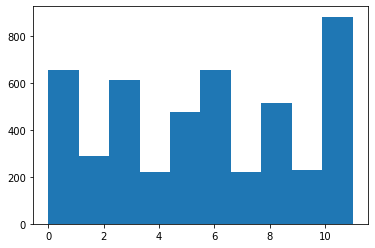

In [20]:
plt.hist(x=dfImageSet['Class'])

In [21]:
print('Image with max width -' +  str(dfImageSet['ImageWidth'].max()))
print('Image with min width -' + str(dfImageSet['ImageWidth'].min()))
print('Image with max Height -' + str(dfImageSet['ImageHeight'].max()))
print('Image with min Height -' + str(dfImageSet['ImageHeight'].min()))

Image with max width -3457
Image with min width -49
Image with max Height -3991
Image with min Height -49


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


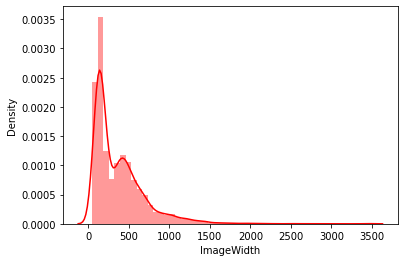

In [22]:
sns.distplot(dfImageSet.ImageWidth,color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


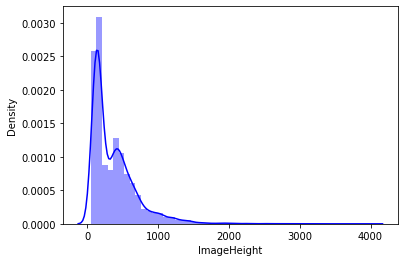

In [23]:
sns.distplot(dfImageSet.ImageHeight,color='blue')

As per above details there are images of various sizes (dimension)

Lets resize all images to one size. There is no fixed rule for what size to select. We can just consider some height and width. Here I am considering 256*256*3

In [ ]:
dfImageSet.shape

(4750, 6)

There are total 4750 images considering all classes

In [ ]:
dfImageSet[dfImageSet['ImageWidth']>1000].shape

(236, 6)

In [ ]:
dfImageSet[dfImageSet['ImageWidth']<80].shape

(205, 6)

In [ ]:
dfImageSet[dfImageSet['ImageHeight']>1000].shape

(238, 6)

In [ ]:
dfImageSet[dfImageSet['ImageHeight']<80].shape

(205, 6)

Around 5% of the the total images have height < 80 or > 1000
Same case with images having widht < 80 or > 1000

Lets resize images to 256 * 256 * 3 size and store

In [ ]:
from PIL import Image

In [ ]:
dfImageSet[dfImageSet['ImageWidth'] >1000]

,ImageWidth,Class,ImageHeight,PlantName,Filename,ImageChannels
6,1074,0,1074,Black-grass,078eae073.png,3
7,1899,0,1900,Black-grass,0ace21089.png,3
9,1782,0,1836,Black-grass,0bb75ded8.png,3
11,1328,0,1328,Black-grass,0c67c3fc3.png,3
15,1417,0,1417,Black-grass,0d4f74f4a.png,3
...,...,...,...,...,...,...
4726,1174,11,1310,Sugar beet,eb2b13b27.png,3
4727,1064,11,1064,Sugar beet,f171da2ef.png,3
4728,1004,11,1004,Sugar beet,f1bb1de07.png,3
4732,1005,11,1005,Sugar beet,fef5e7066.png,3


In [ ]:
dfImageSet[dfImageSet.index==4726]

,ImageWidth,Class,ImageHeight,PlantName,Filename,ImageChannels
4726,1174,11,1310,Sugar beet,eb2b13b27.png,3


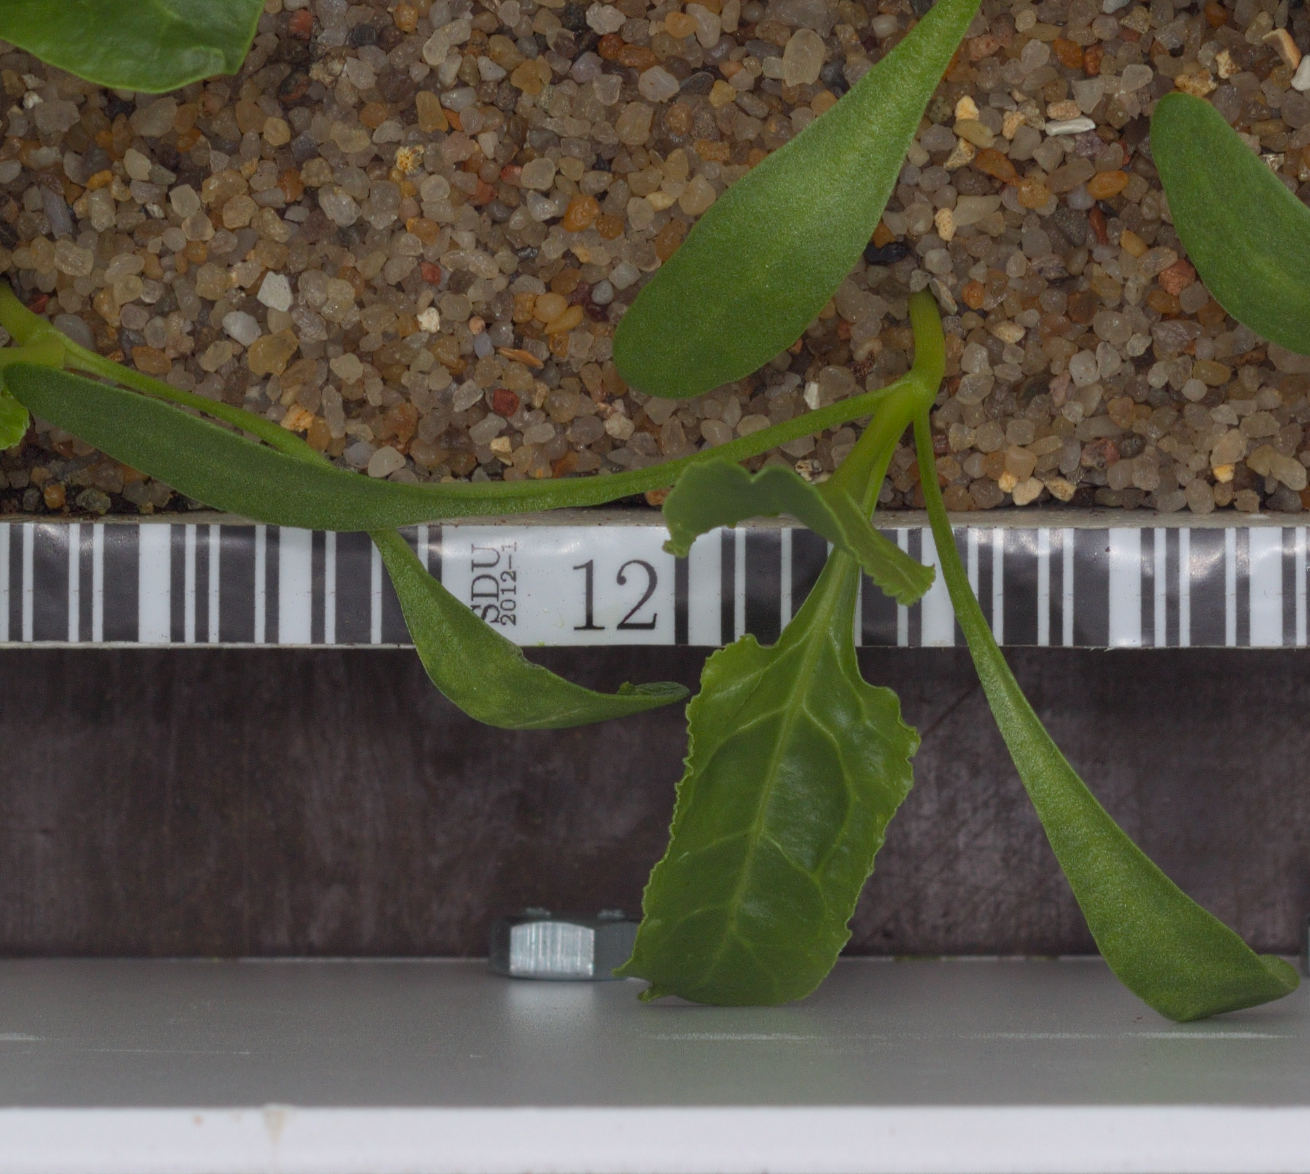

In [ ]:
img1 = Image.open(basefolder + '/' + 'Sugar beet' + '/' + 'eb2b13b27.png') 
img1

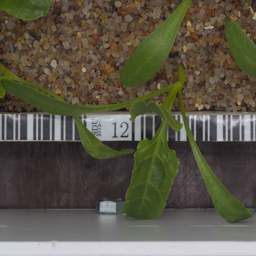

In [ ]:
img1.resize((256,256))

Lets resize images to 256*256*3 size

In [ ]:
img1 = img1.resize((256,256))

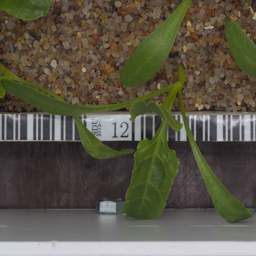

In [ ]:
img1

In [ ]:
# Iterate through each class folder in training data set and read image, resize it to 256*256 and store in ndarray
# IN this process we will create x and y data in training data set
i=0
for folder in folderlst :
  classFolder = basefolder + '/' + folder
  files = [f for f in os.listdir(classFolder) if os.path.isfile(os.path.join(classFolder, f))]
  for fi in files :
    #print(fi)
    completeFilePath = classFolder + '/' + fi
    Image = tf.keras.preprocessing.image.load_img(completeFilePath)
    Image = Image.resize((256,256))
    Imagearr = tf.keras.preprocessing.image.img_to_array(Image)

    if i==0 :
      x = np.array(Imagearr, ndmin=4) #Lets define and assign value to 4-D array    
    else :
      a= np.array(Imagearr, ndmin=4)  #Lets define and assign new value 
      x = np.append(x,a,axis=0)       #Append it to existing array
    
    #y value
    if i==0 :
      y = np.array(labels[folder], ndmin=1) #Lets define and assign value to 1-D array    
    else :
      a= np.array(labels[folder], ndmin=1)  #Lets define and assign new value 
      y = np.append(y,a,axis=0)                  #Append it to existing array
    
    i=i+1

In [27]:
(unique, counts) = np.unique(y, return_counts=True)

In [28]:
print(unique)
print(counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[263 390 287 611 221 475 654 221 516 231 496 385]


In [29]:
#Lets save this data into .npy file
from numpy import asarray, save

In [30]:
save('/content/drive/MyDrive/LablFiles/CNN_Project_1/y_train.npy',y)  # save labels into file 

In [ ]:
save('/content/drive/MyDrive/LablFiles/CNN_Project_1/train.npy',x)    # save image data into file

In [ ]:
# Just to check if data is correctly saved or not
from numpy import load
x1 = load('/content/drive/MyDrive/LablFiles/CNN_Project_1/train.npy')

In [ ]:
x1.shape

(4750, 256, 256, 3)

In [ ]:
x.shape

(4750, 256, 256, 3)

The images in 'test' folder are not classified...i.e. label is not available. This data can be used like production data to predict class using deployed model. No need to covert data into ndarray. Through GUI image will be accepted and will be converted into adarray, on the fly, during prediction.